In [ ]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [ ]:
#Get Timings of Messages
#Get Timings of Merges from Forks
#Try to find some correlation with successful projects
data=pd.read_csv("../bigfiles/messages_2019_8.csv", usecols=["list","datetime","subject","body"], header=0)
data['datetime'] = pd.to_datetime(data['datetime'])
project_data_sorted = data.sort_values(by='datetime')
unique_projects=np.unique(list(data['list']))
start_date = pd.to_datetime('2003-04-15 14:48:40-07')
end_date = pd.to_datetime('2019-08-31 16:25:30-07:00')

filtered_data = data[(data['datetime'] >= start_date) & (data['datetime'] <= end_date)]

/var/folders/db/lqw0qtln00x0zzx380__sczm0000gn/T/ipykernel_8925/879936485.py:5: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  data['datetime'] = pd.to_datetime(data['datetime'])


In [ ]:
data=pd.read_csv("../bigfiles/messages_2019_8.csv", usecols=["list","datetime","subject","body"], header=0)

In [ ]:
data['datetime'] = pd.to_datetime(data['datetime'])

/var/folders/db/lqw0qtln00x0zzx380__sczm0000gn/T/ipykernel_8925/2412623082.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  data['datetime'] = pd.to_datetime(data['datetime'])


In [ ]:
project_data_sorted = data.sort_values(by='datetime')

In [ ]:
unique_projects=np.unique(list(data['list']))

In [ ]:
project_dict={}
i=0
for unique_project in unique_projects:
    project_dict[i]=unique_project
    i+=1

In [ ]:
project_dict_reverse={}
i=0
for unique_project in unique_projects:
    project_dict_reverse[unique_project]=i
    i+=1

In [ ]:
lists_df=pd.read_csv("../bigfiles/lists_2019_8.csv", usecols=["listid","listname","status", 'start_date','end_date'], header=0, encoding="ISO-8859-1")

In [ ]:
status_targets=[]
for unique_project in unique_projects:
    target_row=lists_df[lists_df['listid']==unique_project]
    status=list(target_row.status)[0]
    status_targets.append(status)
status_targets=np.array(status_targets)

In [ ]:
start_date = pd.to_datetime('2003-04-15 14:48:40-07')
end_date = pd.to_datetime('2019-08-31 16:25:30-07:00')

filtered_data = data[(data['datetime'] >= start_date) & (data['datetime'] <= end_date)]

Message Distribution Over Time (bimonthly bins)

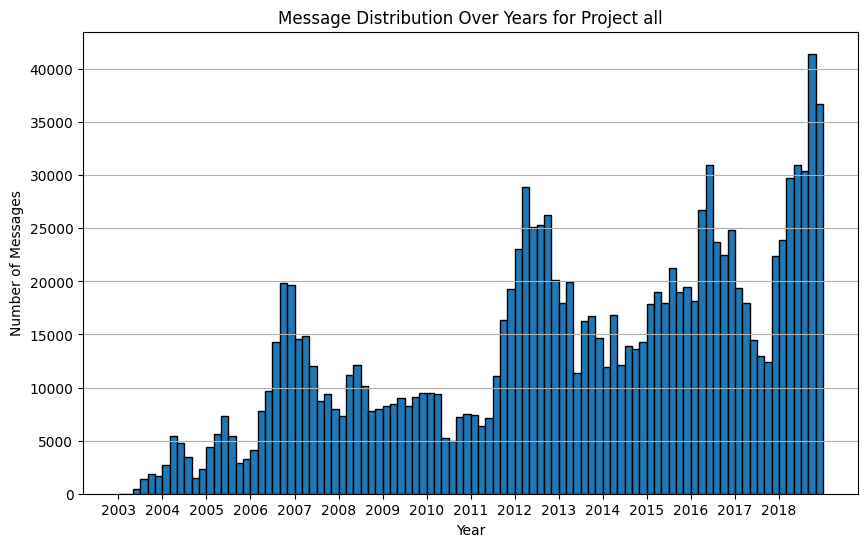

In [ ]:
project_years = filtered_data['datetime'].apply(lambda x: int(x.year) + int(x.month)/12)
plt.figure(figsize=(10, 6))
plt.hist(project_years, bins=np.arange(2003, 2019,step=.166666), edgecolor='black')  # bins from 2003 to 2022
plt.title(f'Message Distribution Over Years for Project {"all"}')
plt.xlabel('Year')
plt.ylabel('Number of Messages')
plt.xticks(np.arange(2003, 2019))  # Set x-ticks to be every year for clarity
plt.grid(axis='y')
plt.show()

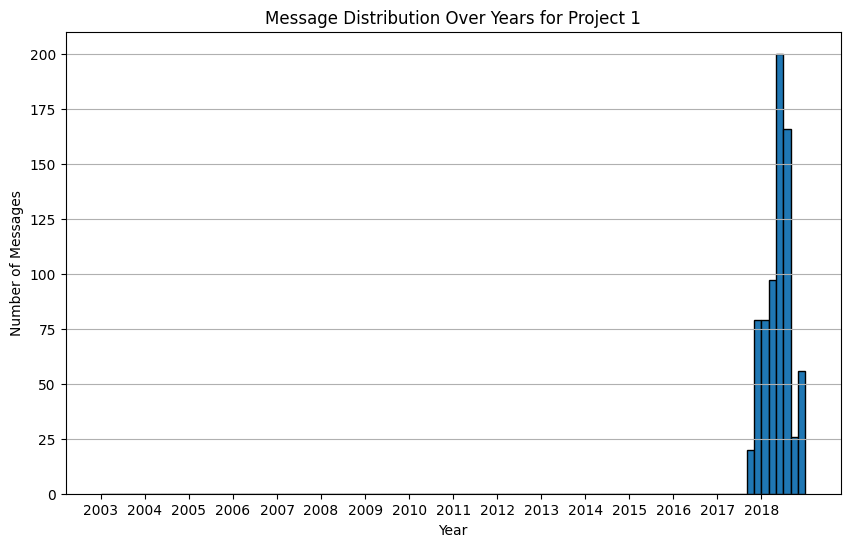

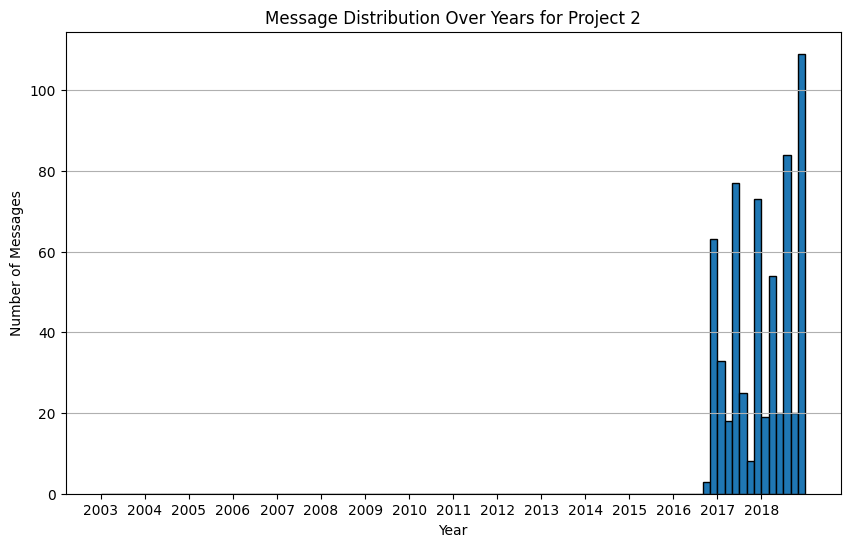

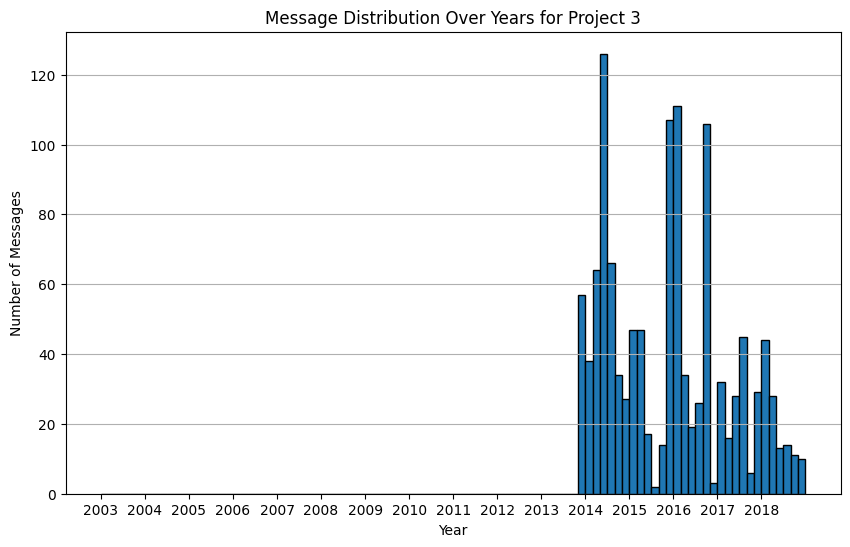

In [ ]:
i=0
for project_id in unique_projects:
    project_data = filtered_data[filtered_data['list'] == project_id]

    # Extract the year from each datetime for the current project
    # print(type(project_data['datetime']))
    project_years = project_data['datetime'].apply(lambda x: int(x.year) + int(x.month)/12)
    plt.figure(figsize=(10, 6))
    plt.hist(project_years, bins=np.arange(2003, 2019,step=.166666), edgecolor='black')  # bins from 2003 to 2022
    plt.title(f'Message Distribution Over Years for Project {project_id}')
    plt.xlabel('Year')
    plt.ylabel('Number of Messages')
    plt.xticks(np.arange(2003, 2019))  # Set x-ticks to be every year for clarity
    plt.grid(axis='y')
    plt.show()
    i+=1
    if i>2:
        break

In [ ]:
commit_data=pd.read_csv("../bigfiles/commits_2019_8.csv", header=0)

/var/folders/db/lqw0qtln00x0zzx380__sczm0000gn/T/ipykernel_8925/1907294833.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  commit_data=pd.read_csv("../bigfiles/commits_2019_8.csv", header=0)


In [ ]:
commit_data['commit_datetime'] = pd.to_datetime(commit_data['commit_datetime'])

/var/folders/db/lqw0qtln00x0zzx380__sczm0000gn/T/ipykernel_8925/3660982828.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  commit_data['commit_datetime'] = pd.to_datetime(commit_data['commit_datetime'])


In [ ]:
commit_filtered_data = commit_data[(commit_data['commit_datetime'] >= start_date) & (commit_data['commit_datetime'] <= end_date)]

In [ ]:
unique_projects

array([  1,   2,   3,   5,   6,   7,   8,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  37,  38,  39,  40,  41,  42,
        43,  44,  45,  47,  48,  49,  50,  51,  52,  53,  54,  55,  56,
        57,  58,  59,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
        71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
        84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 112, 113, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124,
       127, 128, 129, 130, 131, 132, 134, 135, 136, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 146, 147, 153, 154, 155, 156, 157, 159,
       160, 161, 163, 164, 167, 168, 169, 170, 171, 172, 173, 175, 176,
       177, 178, 179, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190,
       191, 192, 194, 195, 196, 197, 199, 200, 201, 202, 203, 20

Commit Distribution Over Time (bimonthly bins)

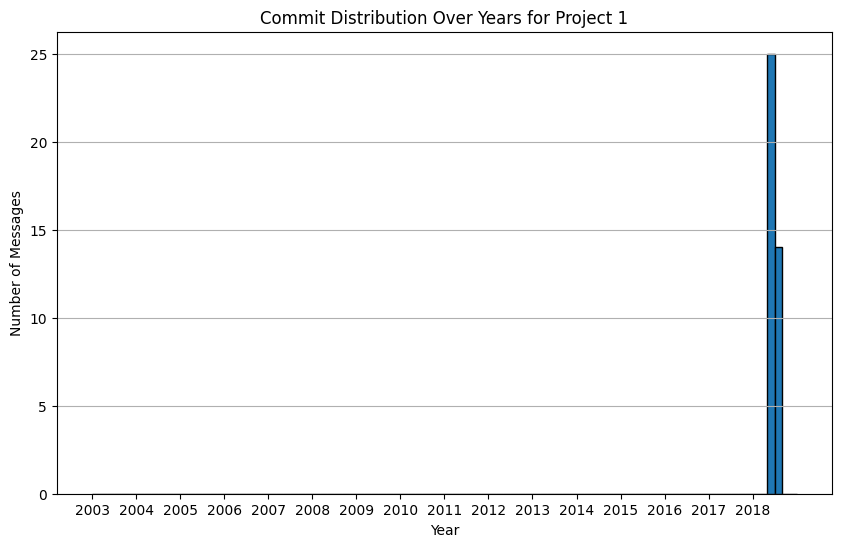

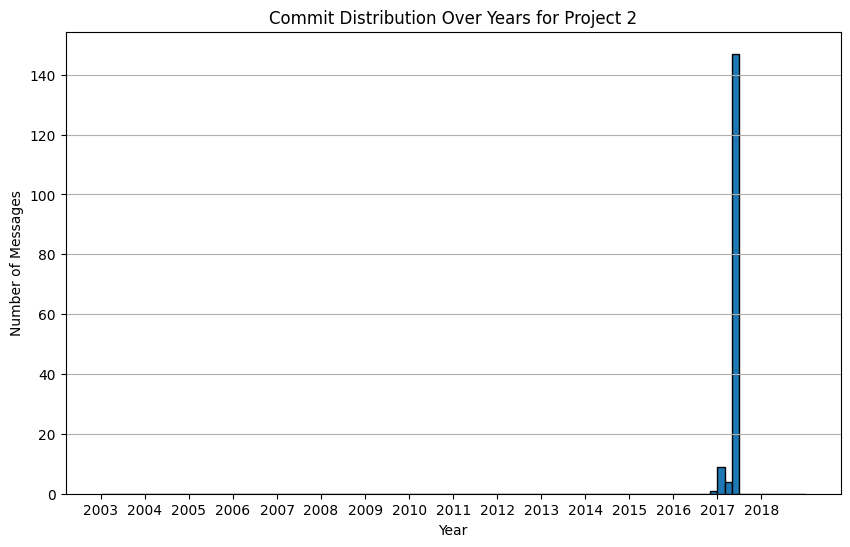

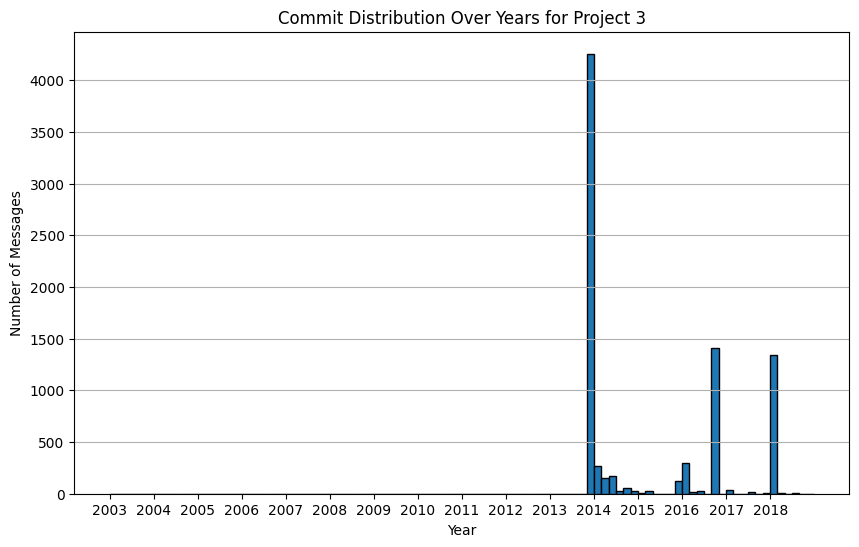

In [ ]:
i=0
for project_id in unique_projects:
    project_data = commit_filtered_data[commit_filtered_data['list'] == project_id]

    # Extract the year from each datetime for the current project
    # print(type(project_data['datetime']))
    project_years = project_data['commit_datetime'].apply(lambda x: int(x.year) + int(x.month)/12)
    plt.figure(figsize=(10, 6))
    plt.hist(project_years, bins=np.arange(2003, 2019,step=.166666), edgecolor='black')  # bins from 2003 to 2022
    plt.title(f'Commit Distribution Over Years for Project {project_id}')
    plt.xlabel('Year')
    plt.ylabel('Number of Messages')
    plt.xticks(np.arange(2003, 2019))  # Set x-ticks to be every year for clarity
    plt.grid(axis='y')
    plt.show()
    i+=1
    if i>2:
        break

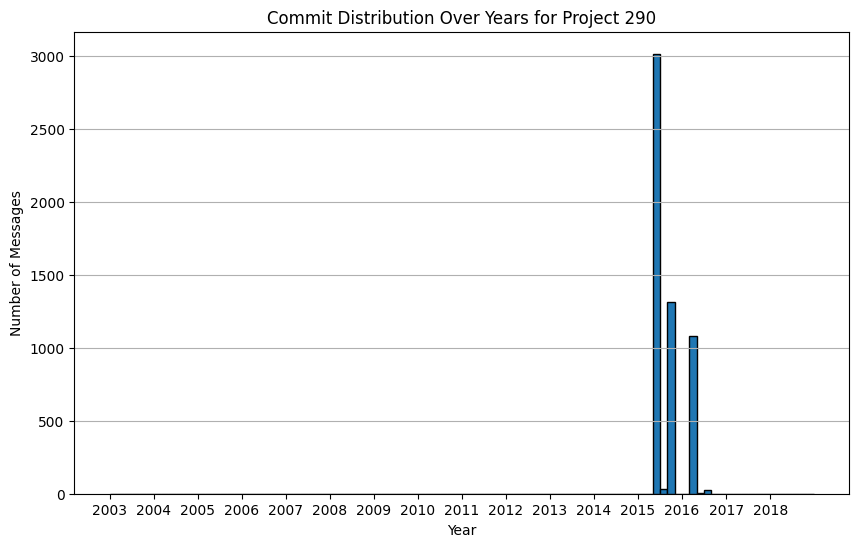

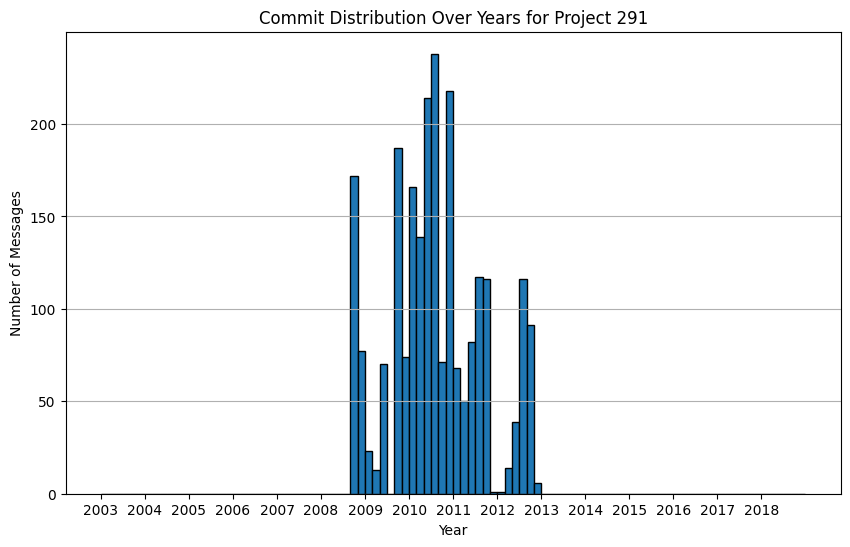

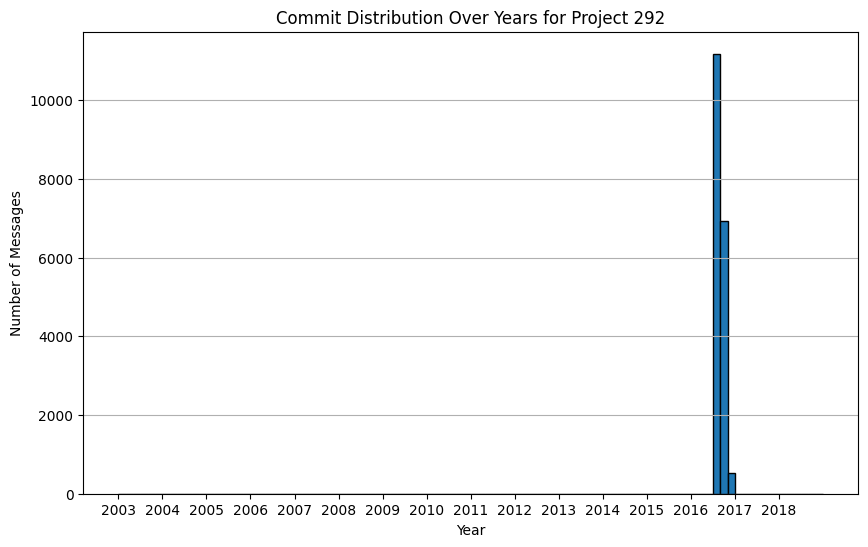

In [ ]:
i=0
for project_id in unique_projects[250:]:
    project_data = commit_filtered_data[commit_filtered_data['list'] == project_id]

    # Extract the year from each datetime for the current project
    # print(type(project_data['datetime']))
    project_years = project_data['commit_datetime'].apply(lambda x: int(x.year) + int(x.month)/12)
    plt.figure(figsize=(10, 6))
    plt.hist(project_years, bins=np.arange(2003, 2019,step=.166666), edgecolor='black')  # bins from 2003 to 2022
    plt.title(f'Commit Distribution Over Years for Project {project_id}')
    plt.xlabel('Year')
    plt.ylabel('Number of Messages')
    plt.xticks(np.arange(2003, 2019))  # Set x-ticks to be every year for clarity
    plt.grid(axis='y')
    plt.show()
    i+=1
    if i>2:
        break

In [ ]:
commit_data['commit_datetime'].diff()

0                     NaT
1         0 days 00:00:00
2         0 days 00:00:00
3         0 days 00:00:07
4         0 days 00:00:00
                ...      
3655487   0 days 00:00:00
3655488   0 days 00:00:00
3655489   0 days 04:04:24
3655490   0 days 00:00:00
3655491   0 days 00:00:00
Name: commit_datetime, Length: 3655492, dtype: timedelta64[ns]

In [ ]:
#Disregard, this is to truncate for GPT
# pd.read_csv("../bigfiles/commits_2019_8.csv", header=0,nrows=150).to_csv("commits.csv")
# pd.read_csv("../bigfiles/messages_2019_8.csv", header=0, nrows=150).to_csv("messages.csv")

In [ ]:
#adding data/making new dataset

### Messages

### Filters
fork merge: (body) "This is a PR merged from a forked repository."
vote: "[VOTE]"


/var/folders/db/lqw0qtln00x0zzx380__sczm0000gn/T/ipykernel_8925/1124619951.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  filter=filtered_data['body'].str.contains("").fillna(False)


[    0     0   426  1386  1885  1698  2749  5432  4767  3461  1483  2342
  4432  5651  7337  5450  2880  3289  4141  7813  9696 14338 19820 19670
 14567 14897 12022  8696  9352  7943  7315 11187 12124 10186  7837  7937
  8291  8457  9002  8242  9063  9415  9353  9314  5213  4981  7190  7533
  7376  6416  7130 11123 16364 19273 23037 28882 25117 25354 26282 20134
 17946 19900 11348 16258 16752 14653 11955 16789 12122 13947 13643 14266
 17860 19009 18000 21252 19016 19433 18120 26765 30936 23743 22445 24850
 19423 17954 14471 12974 12396 22366 23890 29725 30935 30441 41448 36738]


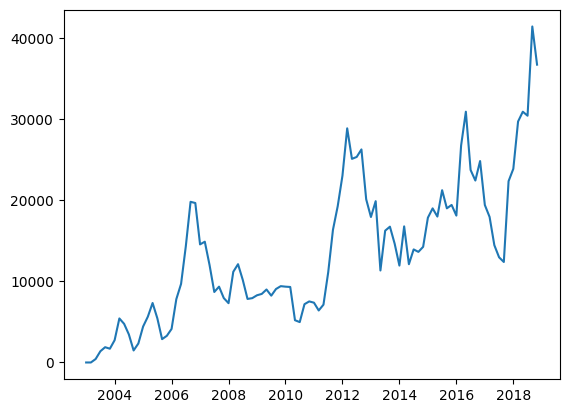

In [ ]:

filter=filtered_data['body'].str.contains("").fillna(False)
specific_data = filtered_data[filter]
specific = filtered_data[filtered_data['list'] == project_id]
project_years = specific_data['datetime'].apply(lambda x: int(x.year) + int(x.month)/12)
hist=np.histogram(list(project_years),bins=np.arange(2003, 2019,step=.166666))
print(hist[0])
# for i in range(0,250):
plt.plot(hist[1][:-1],hist[0])
# plt.ylim((0,10))
plt.show()
# dataset.append(hist[0])

In [ ]:
# filter=filtered_data['body'].str.contains("").fillna(False)
# specific_data = filtered_data[filter]
dataset=[]
column='body'
string='Update'
for project_id in unique_projects:
    project_data = filtered_data[filtered_data['list'] == project_id]
    filter=project_data[column].str.contains(string).fillna(False)
    specific_data = project_data[filter]
    # specific_data = specific_data[specific_data['list'] == project_id]
    project_years = specific_data['datetime'].apply(lambda x: int(x.year) + int(x.month)/12)
    hist=np.histogram(list(project_years),bins=np.arange(2003, 2019,step=.166666))
    # print(hist)
    dataset.append(hist[0])

/var/folders/db/lqw0qtln00x0zzx380__sczm0000gn/T/ipykernel_8925/2075319738.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  filter=project_data[column].str.contains(string).fillna(False)


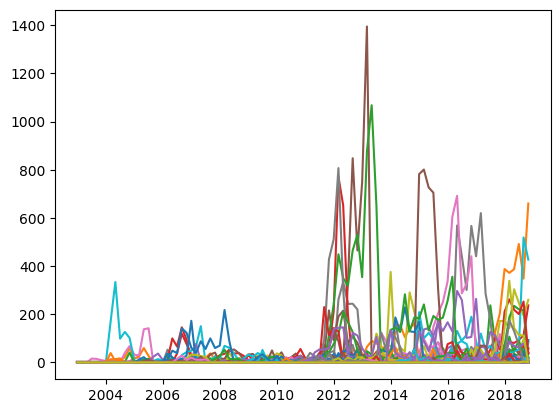

In [ ]:
for i in range(0,len(dataset)):
    plt.plot(hist[1][:-1],dataset[i])
plt.show()

Commits

[     0      0      0      0      0      0   2658   3549   2558   5225
  11859  17393  15032   9115  12351   9865   4188   7365  14716  25762
  30293  48042  50228  50092  30791  35069  33836  19554  24591  17369
  16048  18904  19308  11619  12843   9297  14454  17945  13574  17380
  15608  17790  13788  14411   9202  14764  18940  26594  16066  15854
  24533  29470  31215  77546  55552  48298  37980  51237  66473  58277
  52923  67450  49386  38921  46901  45746  45657  69201  33835  41374
  43262  33610 155564 228549 133695  93061 121262  57385  59476 125829
  85560  98487 116119 101467  80793  73812  51302  55700  43842  38986
  27533  10947  14004   7699   7024  14762]


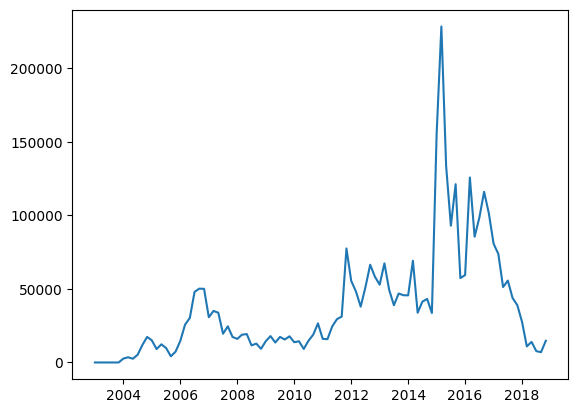

In [ ]:

filter=commit_filtered_data['messageid'].str.contains("").fillna(False)
specific_data = commit_filtered_data[filter]
specific = filtered_data[filtered_data['list'] == project_id]
project_years = specific_data['commit_datetime'].apply(lambda x: int(x.year) + int(x.month)/12)
hist=np.histogram(list(project_years),bins=np.arange(2003, 2019,step=.166666))
print(hist[0])
# for i in range(0,250):
plt.plot(hist[1][:-1],hist[0])
# plt.ylim((0,10))
plt.show()
# dataset.append(hist[0])

In [ ]:
commit_dataset=[]
column='messageid'
string=''
for project_id in unique_projects:
    project_data = commit_filtered_data[commit_filtered_data['list'] == project_id]
    filter=project_data[column].str.contains(string).fillna(False)
    specific_data = project_data[filter]
    # specific_data = specific_data[specific_data['list'] == project_id]
    project_years = specific_data['commit_datetime'].apply(lambda x: int(x.year) + int(x.month)/12)
    hist=np.histogram(list(project_years),bins=np.arange(2003, 2019,step=.166666))
    # print(hist)
    commit_dataset.append(hist[0])

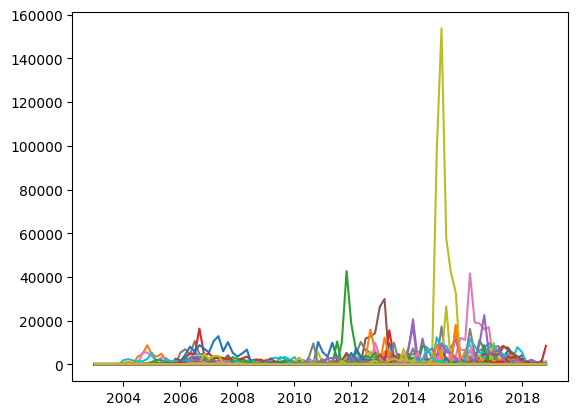

In [ ]:
for i in range(0,len(dataset)):
    plt.plot(hist[1][:-1],commit_dataset[i])
plt.show()

In [ ]:
len(dataset)

269

In [ ]:
lists_df=pd.read_csv("../bigfiles/lists_2019_8.csv", usecols=["listid","listname","status", 'start_date','end_date'], header=0, encoding="ISO-8859-1")

In [ ]:
import matplotlib.pyplot as plt

# Convert start_date and end_date to datetime
lists_df['start_date'] = pd.to_datetime(lists_df['start_date'], errors='coerce')
lists_df['end_date'] = pd.to_datetime(lists_df['end_date'], errors='coerce')

# Fill missing end_dates with the current date to represent ongoing projects
lists_df['end_date'].fillna(pd.to_datetime('now'), inplace=True)

# Calculate project lifespan in days
lists_df['lifespan_days'] = (lists_df['end_date'] - lists_df['start_date']).dt.days

# Filter out rows where dates could not be converted (invalid dates)
lists_df_filtered = lists_df.dropna(subset=['start_date', 'lifespan_days'])
lists_df_sorted=lists_df_filtered.sort_values(by='start_date')

/var/folders/db/lqw0qtln00x0zzx380__sczm0000gn/T/ipykernel_8925/389479724.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  lists_df['end_date'].fillna(pd.to_datetime('now'), inplace=True)


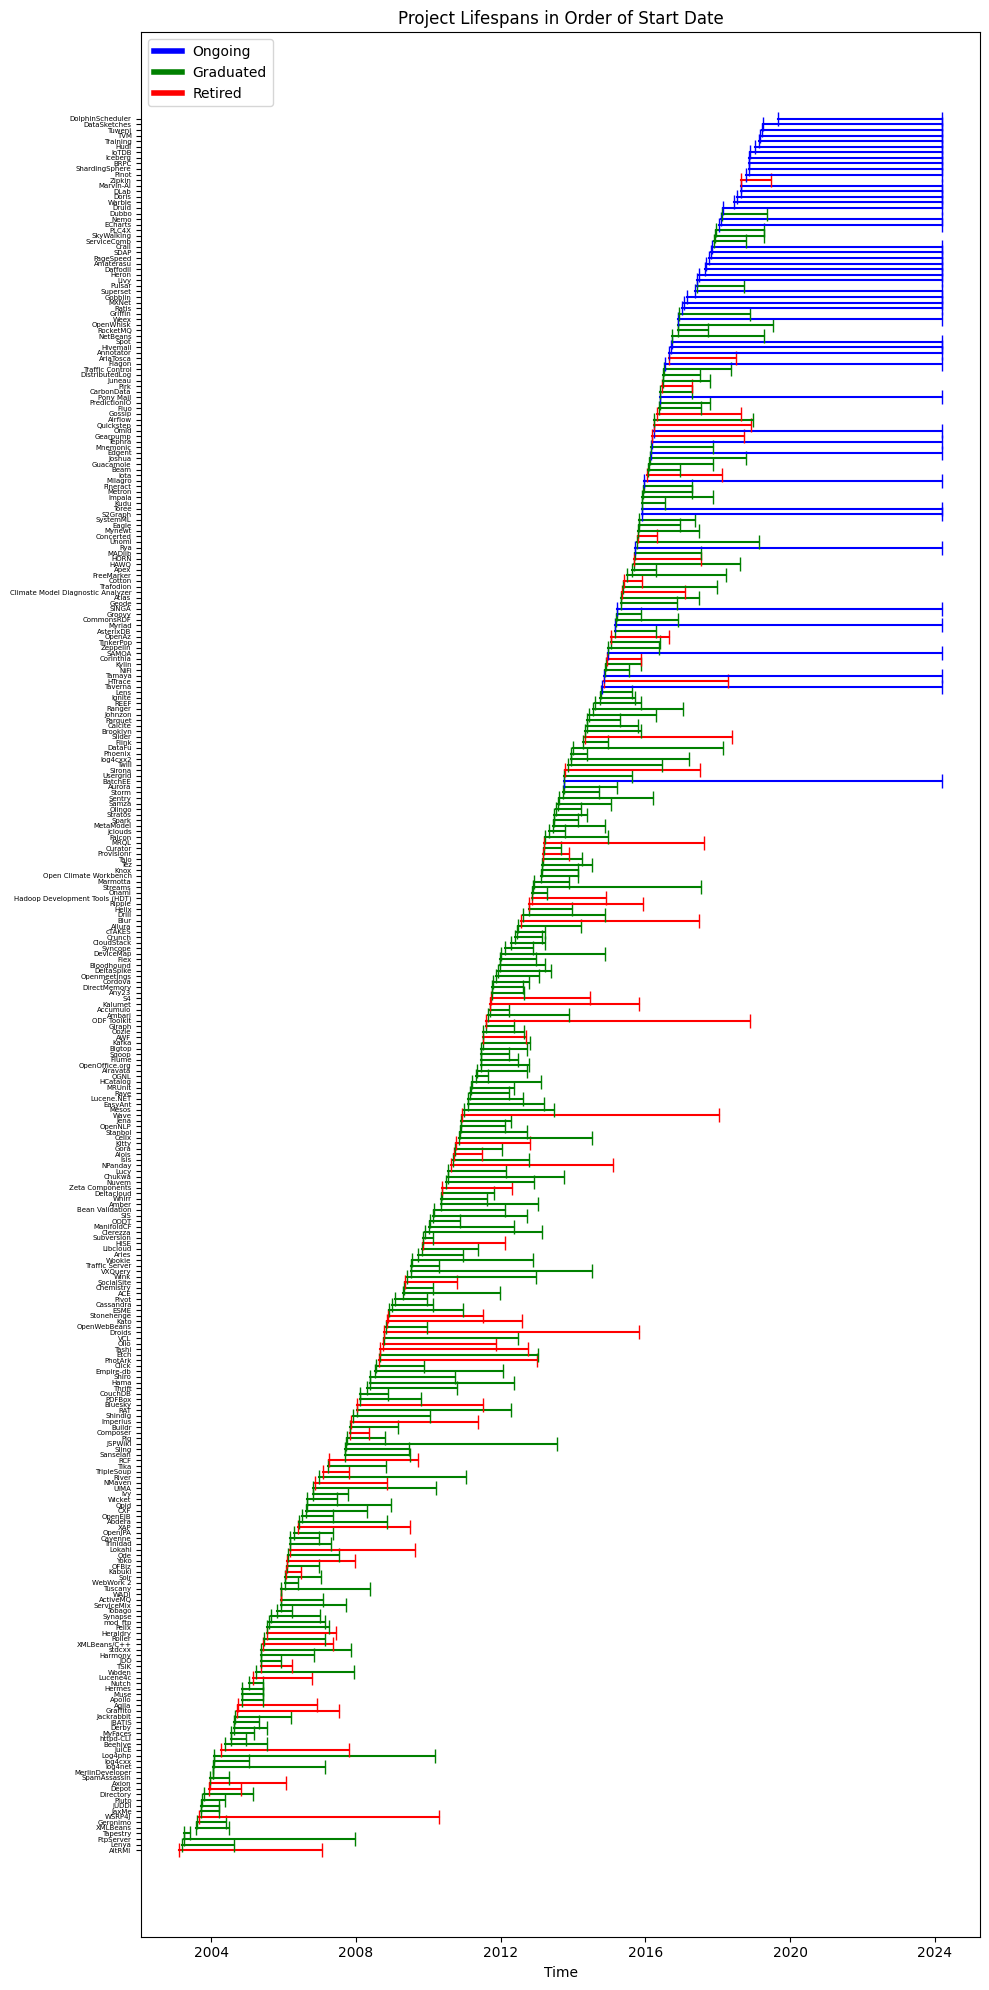

In [ ]:
lists_df_sorted.reset_index(drop=True, inplace=True)

# Re-plotting with the corrected sorted order
fig, ax = plt.subplots(figsize=(10, 20))

# Define colors for each status
colors = {0: 'blue', 1: 'green', 2: 'red'}

# Plot each project with the color based on its status
for i, row in lists_df_sorted.iterrows():
    ax.plot([row['start_date'], row['end_date']], [i, i], marker='|', markersize=10, color=colors[row['status']])

ax.set_yticks(range(len(lists_df_sorted)))
ax.set_yticklabels(lists_df_sorted['listname'], fontsize=5)
ax.set_xlabel('Time')
ax.set_title('Project Lifespans in Order of Start Date')

# Create custom legends
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color=colors[0], lw=4, label='Ongoing'),
                   Line2D([0], [0], color=colors[1], lw=4, label='Graduated'),
                   Line2D([0], [0], color=colors[2], lw=4, label='Retired')]
ax.legend(handles=legend_elements, loc='upper left')

plt.tight_layout()
plt.show()

Case Study

In [ ]:
lists_df

,listid,listname,status,start_date,end_date,lifespan_days
0,1,Amaterasu,0,2017-09-07,2024-03-13 19:58:09.728812,2379
1,2,Annotator,0,2016-08-30,2024-03-13 19:58:09.728812,2752
2,3,BatchEE,0,2013-10-03,2024-03-13 19:58:09.728812,3814
3,4,BRPC,0,2018-11-13,2024-03-13 19:58:09.728812,1947
4,5,Crail,0,2017-11-01,2024-03-13 19:58:09.728812,2324
...,...,...,...,...,...,...
307,308,XAP,2,2006-05-22,2009-06-26 00:00:00.000000,1131
308,309,XMLBeans/C++,2,2005-06-06,2007-05-16 00:00:00.000000,709
309,310,Yoko,2,2006-01-31,2007-12-17 00:00:00.000000,685
310,311,Zeta Components,2,2010-05-21,2012-04-20 00:00:00.000000,700


In [ ]:
project_name="Etch"
target_row=lists_df[lists_df['listname']==project_name]
index=project_dict_reverse[list(target_row.listid)[0]]
start_date=list(target_row.start_date.apply(lambda x: int(x.year) + int(x.month)/12))[0]
end_date=list(target_row.end_date.apply(lambda x: int(x.year) + int(x.month)/12))[0]

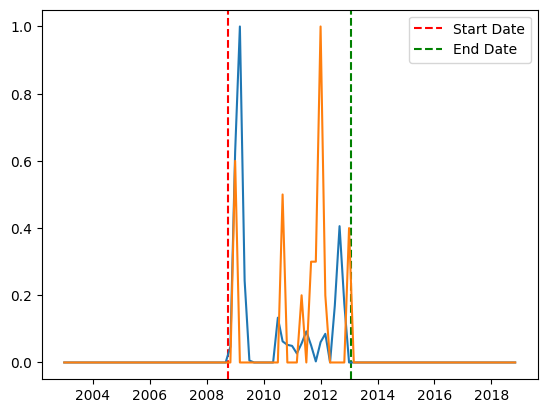

In [ ]:
# index=97
plt.axvline(x=start_date, color='r', linestyle='--', label='Start Date')
plt.axvline(x=end_date, color='g', linestyle='--', label='End Date')
plt.plot(hist[1][:-1],commit_dataset[index]/max(commit_dataset[index]))
plt.plot(hist[1][:-1],dataset[index]/max(dataset[index]))
plt.legend()
plt.show()

In [ ]:
#deduplicate commit data
commit_data_unique = commit_filtered_data.drop_duplicates(subset=['messageid'])

In [ ]:
len(commit_filtered_data)

3655492

In [ ]:
len(commit_data_unique)

496539

[    0     0     0     0     0     0   363   846   588   426   634  1133
  1447  1568  1690  1163   692  1213  2204  3683  3862  5701  6847  7455
  5849  6172  4794  3528  3259  3260  2812  3835  3320  2477  2321  1809
  2128  2494  2870  2526  2790  3477  3588  2807  1625  2130  2014  2671
  2411  2279  3225  4269  4314  7320  6876  6867  5878  7868  8718  7004
  7854  9130  5168  5402  6727  6600  6870  8379  4442  5074  6096  5846
 14843 29647 23759 17710 12563  8004  7124 13394 11713 12301 12434 13096
 10150 10676  8344  7724  6172  4502  2878  1926  1886  1325  1267  1210]


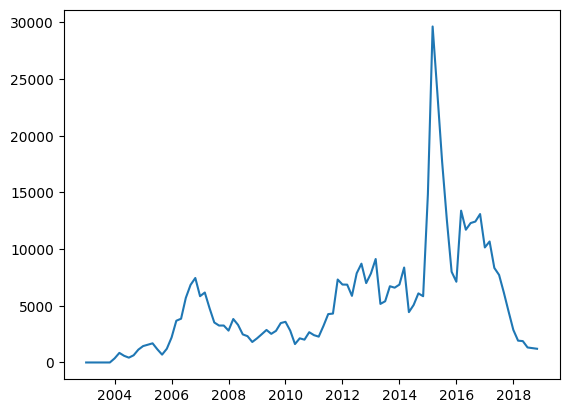

In [ ]:
filter=commit_data_unique['messageid'].str.contains("").fillna(False)
specific_data = commit_data_unique[filter]
specific = filtered_data[filtered_data['list'] == project_id]
project_years = specific_data['commit_datetime'].apply(lambda x: int(x.year) + int(x.month)/12)
# print(len(project_years))
hist=np.histogram(list(project_years),bins=np.arange(2003, 2019,step=.166666))
print(hist[0])
# for i in range(0,250):
plt.plot(hist[1][:-1],hist[0])
# plt.ylim((0,10))
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'project_years' contains the years of commits, adjusted for two-month bins as in your histogram calculation
bins = np.arange(2003, 2019, step=0.166666)  # Two-month bins
project_years = specific_data['commit_datetime'].apply(lambda x: x.year + x.month/12)

# Bin the data according to the specified bins and calculate the average number of commits per bin
binned_data = np.digitize(project_years, bins)
# print(len(specific_data))
commit_bins=[]
for unique_project in unique_projects:
    project_years_new=project_years[specific_data['list']==unique_project]#change to only proj x
    binned_data_new = np.digitize(project_years_new, bins)#update bins
    more_specific=specific_data[specific_data['list']==unique_project]
    # print(len(more_specific))
    commit_counts_per_bin = [more_specific[binned_data_new == i].count() for i in range(1, len(bins))]


# Commit Time Graph Generator

Box plots for bimonthly commits of ongoing, graduated, and retired projects across the study interval. It is shown that graduated projects commit more than retired projects across the entire interval.

In [ ]:
index_=2#0,1,2,or status_targets==True

bins_commits=[]
for i in range(0,len(bins)):
    bins_commits.append([])
commit_counts = []  # List to store average commit counts per bin for each project

for unique_project in unique_projects[status_targets==2]:#True
    project_data = specific_data[specific_data['list'] == unique_project]
    project_years = project_data['commit_datetime'].apply(lambda x: x.year + x.month/12)
    binned_data = np.digitize(project_years, bins)

    # Initialize a list to store counts for each bin
    counts_per_bin = []

    ranges=np.array(list(zip(bins[:-1], bins[1:]))) #range of activity
    target_row=lists_df[lists_df['listid']==unique_project] #specific
    #get start date and end date
    project_start_date=list(target_row.start_date.apply(lambda x: int(x.year) + int(x.month)/12))[0]
    project_end_date=list(target_row.end_date.apply(lambda x: int(x.year) + int(x.month)/12))[0]
    #identify bins where project was active

    #help here making active_bins array
    active_bins=np.where((ranges[:,0]>project_start_date) &
    (ranges[:,1]<project_end_date) )[0]
    for i in active_bins:#len(bins)):
        bins_commits[i].append(len(project_data[binned_data == i]))

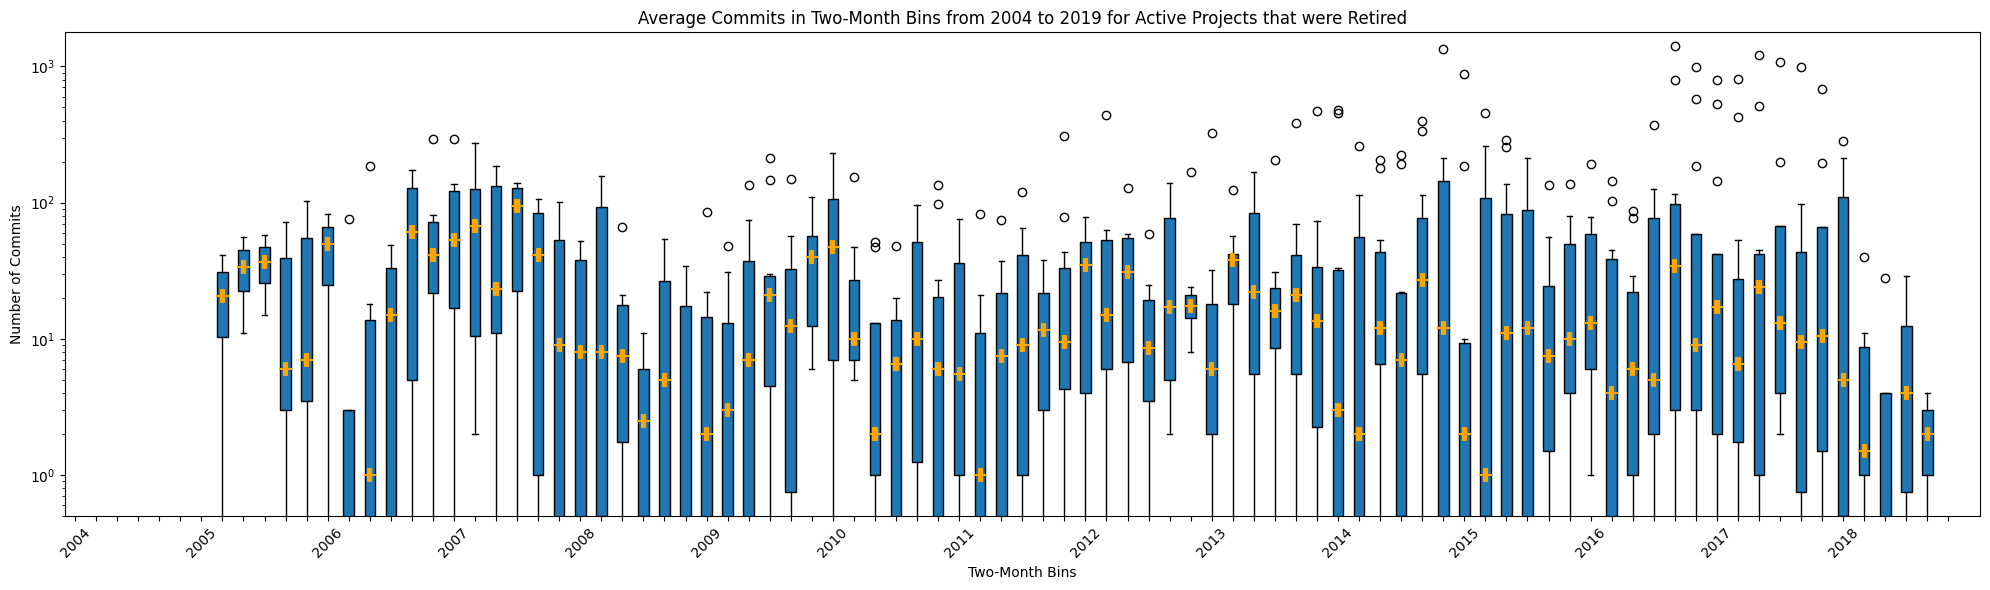

In [ ]:
start_year = 2004  # Starting year of your analysis
end_year = 2019    # Ending year of your analysis
bins_per_year = 6  # Assuming two-month bins, so 6 bins per year

# Calculate the number of years and generate year labels
years = np.arange(start_year, end_year)
labels = []

for year in years:
    for bin_num in range(1, bins_per_year + 1):
        if bin_num == 1:
            labels.append(str(year))  # Mark the start of each year
        else:
            labels.append('')  # Keep other bins within a year unlabeled for clarity

# Adjust figure size as needed
plt.figure(figsize=(20, 6))

# Your boxplot code
bp=plt.boxplot(bins_commits[6:], notch=False, patch_artist=True)
for median in bp['medians']:
    median.set(color='orange', linewidth=1.5,)
    x,y = median.get_data()
    xn = (x-(x.sum()/2.))*0.5+(x.sum()/2.)
    plt.plot(xn, y, color="orange", linewidth=10, solid_capstyle="butt", zorder=4)

# Customizing the plot with year-by-year ticks
plt.xticks(ticks=np.arange(1, len(labels) + 1), labels=labels, rotation=45)
plt.yscale('log')
plt.ylim(.5,10**3.25)
plt.ylabel('Number of Commits')
plt.xlabel('Two-Month Bins')
plt.title('Average Commits in Two-Month Bins from 2004 to 2019 for Active Projects that were Retired')
plt.tight_layout()
plt.show()

In [ ]:
summary_by_operation = commit_filtered_data.groupby('file_operation').agg({
    'addlines': 'sum',
    'dellines': 'sum'
}).reset_index()

In [ ]:
summary_by_operation

,file_operation,addlines,dellines
0,add,97926827,113497
1,copy,289738,315436
2,del,29209,42868997
3,mod,38459171,29307643
4,rm,0,0


In [ ]:
summary_by_operation[summary_by_operation['file_operation']=='del']['addlines'][2]

29209

# Analysis of Annual Operation-Specific Line Change Counts

We have generated box plots for annual operation-specific line change counts for both graduated and retired projects. These plots provide insights into the differences in code change patterns between projects that have successfully graduated and those that have been retired.

Key Observations:
- **Addlines from Add Operation**:
  - Retired projects have an order of magnitude fewer addlines from the add operation compared to graduated projects. This suggests that graduated projects are more active in adding new lines of code, which could be indicative of more robust development and growth.
- **Addlines from Copy Operation**:
  - There is a much higher average and upper interquartile range for addlines from the copy operation in graduated projects compared to retired projects. This indicates that graduated projects may engage more in code reuse or refactoring activities.
- **Line Deletions from Add Operation**:
  - Graduated projects also show a higher average and upper interquartile range for line deletions from the add operation. This could reflect a more dynamic development process with frequent updates and revisions.

The box plots provide a visual comparison of the distribution of line change counts, highlighting differences in the scale and variability of code changes between graduated and retired projects. Understanding these patterns can shed light on the characteristics of successful projects and the challenges faced by those that do not graduate.


In [ ]:
def to_numpy(summary):
    out_array=np.zeros((3,))
    try:
        out_array[0]=summary_by_operation[summary_by_operation['file_operation']=='add']['addlines'][0]
    except:
        out_array[0]=0
    try:
        out_array[1]=summary_by_operation[summary_by_operation['file_operation']=='copy']['addlines'][1]
    except:
        out_array[1]=0
    try:
        out_array[2]=summary_by_operation[summary_by_operation['file_operation']=='copy']['dellines'][1]
    except:
        out_array[2]=0
    # try:
    #     out_array[3]=summary_by_operation[summary_by_operation['file_operation']=='mod']['addlines'][3]
    # except:
    #     out_array[3]=0

    # try:
    #     out_array[4]=summary_by_operation[summary_by_operation['file_operation']=='add']['dellines'][0]
    # except:
    #     out_array[4]=0
    # try:
    #     out_array[5]=summary_by_operation[summary_by_operation['file_operation']=='copy']['dellines'][1]
    # except:
    #     out_array[5]=0
    # try:
    #     out_array[6]=summary_by_operation[summary_by_operation['file_operation']=='del']['dellines'][2]
    # except:
    #     out_array[6]=0
    # try:
    #     out_array[7]=summary_by_operation[summary_by_operation['file_operation']=='mod']['dellines'][3]
    # except:
    #     out_array[7]=0



    return out_array


In [ ]:
# operation_types = ['add', 'copy', 'mod', 'rm']
# predefined_summary = pd.DataFrame({
#     'file_operation': operation_types,
#     'addlines': [0] * len(operation_types),
#     'dellines': [0] * len(operation_types)
# })
total_summary=[]
# Loop through projects
# total_summary = {'addlines': 0, 'dellines': 0}
project_count = 0
for unique_project in unique_projects[status_targets==2]:
    target_row=lists_df[lists_df['listid']==unique_project] #specific
    #get start date and end date
    project_start_date=list(target_row.start_date.apply(lambda x: int(x.year) + int(x.month)/12))[0]
    project_end_date=list(target_row.end_date.apply(lambda x: int(x.year) + int(x.month)/12))[0]
    project_lifespan=project_end_date-project_start_date
    summary_by_operation = commit_filtered_data[
    commit_filtered_data['list']==unique_project
    ].groupby('file_operation').agg({
        'addlines': 'sum',
        'dellines': 'sum'
    }).reset_index()
    if project_lifespan>0:
        summary_by_operation['addlines'] = summary_by_operation['addlines'] / project_lifespan
        summary_by_operation['dellines'] = summary_by_operation['dellines'] / project_lifespan
        project_count+=1
    # if project_count==0:
    #     total_summary=summary_by_operation
    # else:
    operation_dashboard=to_numpy(summary_by_operation)#create dashboard
    total_summary.append(operation_dashboard)
    # total_summary['dellines']+=to_numpy(summary_by_operation['dellines'])

    # print(total_summary)
    # if j>5:
    #     break
total_summary=np.array(total_summary)

In [ ]:
total_summary_1=[]
# Loop through projects
# total_summary = {'addlines': 0, 'dellines': 0}
project_count = 0
for unique_project in unique_projects[status_targets==1]:
    target_row=lists_df[lists_df['listid']==unique_project] #specific
    #get start date and end date
    project_start_date=list(target_row.start_date.apply(lambda x: int(x.year) + int(x.month)/12))[0]
    project_end_date=list(target_row.end_date.apply(lambda x: int(x.year) + int(x.month)/12))[0]
    project_lifespan=project_end_date-project_start_date
    summary_by_operation = commit_filtered_data[
    commit_filtered_data['list']==unique_project
    ].groupby('file_operation').agg({
        'addlines': 'sum',
        'dellines': 'sum'
    }).reset_index()
    if project_lifespan>0:
        summary_by_operation['addlines'] = summary_by_operation['addlines'] / project_lifespan
        summary_by_operation['dellines'] = summary_by_operation['dellines'] / project_lifespan
        project_count+=1
    # if project_count==0:
    #     total_summary=summary_by_operation
    # else:
    operation_dashboard=to_numpy(summary_by_operation)#create dashboard
    total_summary_1.append(operation_dashboard)
    # total_summary['dellines']+=to_numpy(summary_by_operation['dellines'])

    # print(total_summary)
    # if j>5:
    #     break
total_summary_1=np.array(total_summary_1)

# Visualization of Code Contributions Between Graduated and Retired Projects

This visualization effectively compares the distribution of certain types of code contributions between projects that were successfully "Graduated" and those that were "Retired". Key aspects of this visualization include:

- **Logarithmic Scale**: Using a logarithmic scale allows for a clear comparison across a broad range of values. This scale is particularly useful for highlighting differences in the intensity of development activities between successful and unsuccessful projects.
- **Distribution Comparison**: The visualization focuses on comparing the distribution of specific types of code contributions, such as additions, deletions, and copy operations. This comparison provides insights into the nature of development work in graduated versus retired projects.
- **Insights into Development Activities**: The visualization highlights differences in the intensity and types of development activities between successful and unsuccessful projects. For instance, graduated projects may show more active code additions or modifications, reflecting a more dynamic and evolving codebase.

Overall, this visualization serves as a valuable tool for understanding the characteristics of successful projects and identifying areas where retired projects may have lacked in terms of development activities.


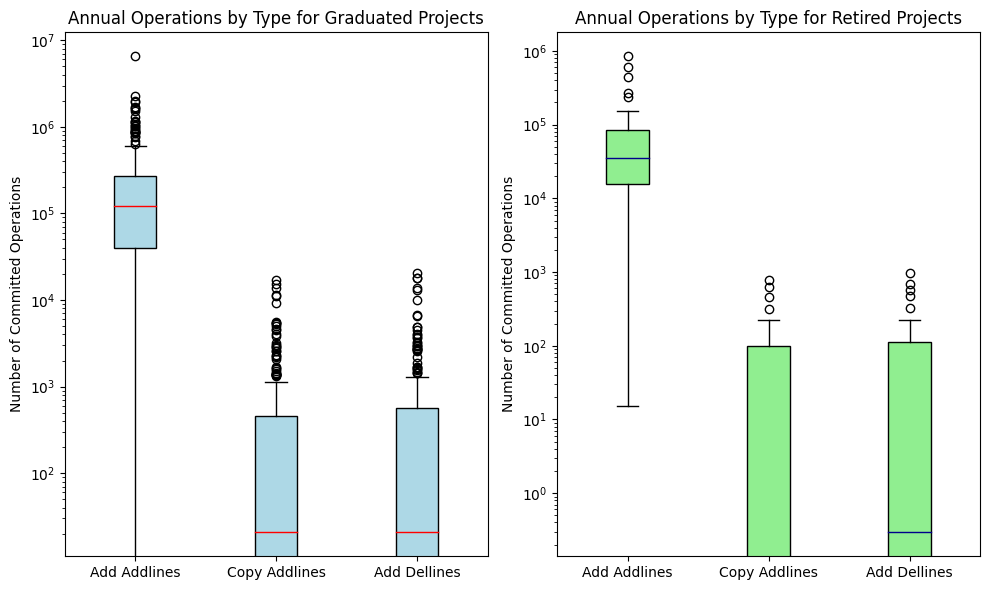

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))  # Create a figure and a set of subplots

# Box plot for 'addlines'
#graduated=[total_summary_1[0], total_summary_1[1], total_summary_1[4]]
ax[0].boxplot(total_summary_1, patch_artist=True, boxprops=dict(facecolor='lightblue'), medianprops=dict(color='red'))
ax[0].set_title('Annual Operations by Type for Graduated Projects')
ax[0].set_ylabel('Number of Committed Operations')
ax[0].set_yscale('log')
ax[0].set_xticklabels(['Add Addlines','Copy Addlines','Add Dellines'])
#Add Addlines, Copy Addlines, and Add Dellines
# Box plot for 'dellines'
# retired=(total_summary[0],total_summary[1],total_summary[5])
ax[1].boxplot(total_summary, patch_artist=True, boxprops=dict(facecolor='lightgreen'), medianprops=dict(color='darkblue'))
ax[1].set_title('Annual Operations by Type for Retired Projects')
ax[1].set_ylabel('Number of Committed Operations')
ax[1].set_yscale('log')
ax[1].set_xticklabels(['Add Addlines','Copy Addlines','Add Dellines'])

plt.tight_layout()
plt.show()

In [ ]:
q1 = np.percentile(total_summary_1[:,0], 25)
median = np.median(total_summary_1[:,0])
q3 = np.percentile(total_summary_1[:,0], 75)

q1_a = np.percentile(total_summary[:,0], 25)
median_a = np.median(total_summary[:,0])
q3_a = np.percentile(total_summary[:,0], 75)
print(total_summary)
# iqr = q3 - q1
# lower_fence = q1 - 1.5 * iqr
# upper_fence = q3 + 1.5 * iqr

# # Identify outliers (if necessary)
# outliers = [x for x in total_summary_1[0] if x < lower_fence or x > upper_fence]

# Compile the statistics into a DataFrame for easy viewing
boxplot_stats_table = pd.DataFrame({
    'Statistic': ['Q1 (25th percentile)', 'Median', 'Q3 (75th percentile)'],# 'IQR', 'Lower Fence', 'Upper Fence', 'Number of Outliers'],
    'Graduated Addlines': [q1, median, q3],# iqr, lower_fence, upper_fence, len(outliers)]
    'Retired Addlines': [q1_a, median_a, q3_a]
})


[[5.48720000e+04 0.00000000e+00 0.00000000e+00]
 [5.98706667e+04 0.00000000e+00 0.00000000e+00]
 [6.02582609e+05 0.00000000e+00 0.00000000e+00]
 [2.95131429e+04 7.72285714e+02 6.88285714e+02]
 [1.46739429e+05 0.00000000e+00 0.00000000e+00]
 [2.72014373e+05 0.00000000e+00 0.00000000e+00]
 [8.10045714e+04 0.00000000e+00 0.00000000e+00]
 [7.13600000e+03 0.00000000e+00 0.00000000e+00]
 [4.40371636e+05 2.18181818e+00 2.18181818e+00]
 [1.48156235e+04 1.32564706e+02 1.46823529e+02]
 [1.39853200e+05 0.00000000e+00 0.00000000e+00]
 [2.20770000e+04 0.00000000e+00 0.00000000e+00]
 [6.42797647e+04 1.87058824e+02 2.25176471e+02]
 [3.40996800e+04 0.00000000e+00 0.00000000e+00]
 [7.76499130e+04 0.00000000e+00 1.04347826e+01]
 [2.92035556e+04 3.11111111e+00 5.33333333e+00]
 [3.38214286e+04 1.62857143e+01 5.85714286e+01]
 [2.25787200e+04 0.00000000e+00 0.00000000e+00]
 [2.18400000e+02 0.00000000e+00 0.00000000e+00]
 [1.99512000e+04 2.11200000e+02 1.96560000e+02]
 [3.37834667e+04 2.26666667e+02 1.344000

In [ ]:
boxplot_stats_table

,Statistic,Graduated Addlines,Retired Addlines
0,Q1 (25th percentile),39718.200000,15887.231017
1,Median,122910.600000,35002.930909
2,Q3 (75th percentile),272014.372881,84934.709753


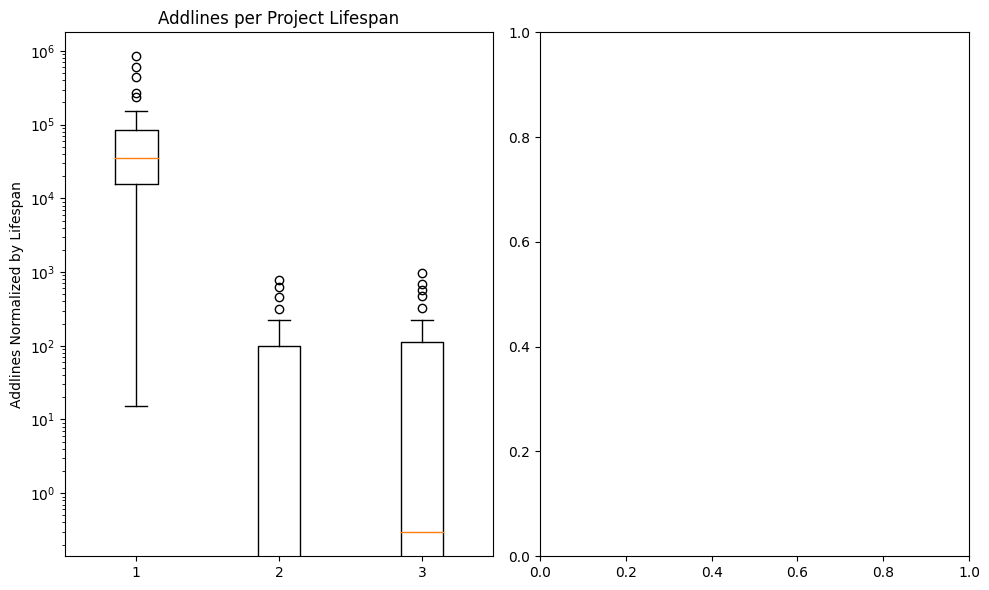

In [ ]:
# fig, ax = plt.subplots(1, 2, figsize=(10, 6))  # Create a figure and a set of subplots

# # Box plot for 'addlines'
# ax[0].boxplot(total_summary)
# ax[0].set_title('Addlines per Project Lifespan')
# ax[0].set_ylabel('Addlines Normalized by Lifespan')
# ax[0].set_yscale('log')

# # Box plot for 'dellines'
# # ax[1].boxplot(dellines_data)
# # ax[1].set_title('Dellines per Project Lifespan')
# # ax[1].set_ylabel('Dellines Normalized by Lifespan')

# plt.tight_layout()
# plt.show()

In [ ]:
# total_summary = None
# j=0
# for unique_project in unique_projects[status_targets==2]:
#     target_row=lists_df[lists_df['listid']==unique_project] #specific
#     #get start date and end date
#     project_start_date=list(target_row.start_date.apply(lambda x: int(x.year) + int(x.month)/12))[0]
#     project_end_date=list(target_row.end_date.apply(lambda x: int(x.year) + int(x.month)/12))[0]
#     project_lifespan=project_end_date-project_start_date
#     summary_by_operation = commit_filtered_data[
#     commit_filtered_data['list']==unique_project
#     ].groupby('file_operation').agg({
#         'addlines': 'sum',
#         'dellines': 'sum'
#     }).reset_index()
#     summary_by_operation['addlines'] = summary_by_operation['addlines'] / project_lifespan
#     summary_by_operation['dellines'] = summary_by_operation['dellines'] / project_lifespan
#     if j==0:
#         total_summary=summary_by_operation
#     else:
#         total_summary['addlines']+=summary_by_operation['addlines']
#         total_summary['dellines']+=summary_by_operation['dellines']
#     j+=1
#     print(total_summary)
#     if j>5:
#         break
# total_summary['addlines']=total_summary['addlines']/j
# total_summary['dellines']=total_summary['dellines']/j
# # print(total_summary)

  file_operation      addlines    dellines
0            add  54872.000000    0.000000
1           copy      0.000000    0.000000
2            mod   1372.444444  519.555556
  file_operation       addlines    dellines
0            add  114742.666667    0.000000
1           copy    1188.000000  562.666667
2            mod            NaN         NaN
  file_operation       addlines       dellines
0            add  717325.275362       0.000000
1           copy    1188.000000  306883.014493
2            mod            NaN            NaN
  file_operation       addlines       dellines
0            add  746838.418220       0.000000
1           copy    1960.285714  307571.300207
2            mod            NaN            NaN
  file_operation       addlines       dellines
0            add  893577.846791       0.000000
1           copy    7901.714286  310479.014493
2            mod            NaN            NaN
  file_operation      addlines       dellines
0            add  1.165592e+06       0.000

In [ ]:
summary_by_operation

,file_operation,addlines,dellines
0,add,272014.372881,0.000000
1,del,0.000000,164553.966102
2,mod,96426.101695,57152.135593


# Summary of "message_analysis.ipynb" Notebook

## Initial Setup
- **Libraries Imported**: Essential Python libraries such as `numpy`, `pandas`, `requests`, and `matplotlib.pyplot` are imported for data manipulation, HTTP requests, and data visualization.

## Data Loading and Preliminary Analysis
- **Dataset Loading**: A dataset named `messages_2019_8.csv` is loaded into a DataFrame called `data`, focusing on columns related to project lists, datetime, subjects, and bodies of messages.
- **Datetime Conversion**: The `datetime` column is converted to Pandas datetime format for time-based data manipulation and analysis.
- **Data Sorting**: The data is sorted based on the `datetime` column for chronological analysis of the messages.

## Objective
- The primary objective in the initial stages of the notebook seems to be preparing and preliminarily analyzing a dataset of messages for further detailed examination. The analysis aims to explore the timing of messages, possibly to find correlations with successful project outcomes.


In [ ]:
total_summary_1=[]
# Loop through projects
# total_summary = {'addlines': 0, 'dellines': 0}
project_count = 0
for unique_project in unique_projects[status_targets>0]:
    target_row=lists_df[lists_df['listid']==unique_project] #specific
    #get start date and end date
    project_start_date=list(target_row.start_date.apply(lambda x: int(x.year) + int(x.month)/12))[0]
    project_end_date=list(target_row.end_date.apply(lambda x: int(x.year) + int(x.month)/12))[0]
    project_lifespan=project_end_date-project_start_date
    summary_by_operation = commit_filtered_data[
    commit_filtered_data['list']==unique_project
    ].groupby('file_operation').agg({
        'addlines': 'sum',
        'dellines': 'sum'
    }).reset_index()
    if project_lifespan>0:
        summary_by_operation['addlines'] = summary_by_operation['addlines'] / project_lifespan
        summary_by_operation['dellines'] = summary_by_operation['dellines'] / project_lifespan
        project_count+=1
    # if project_count==0:
    #     total_summary=summary_by_operation
    # else:
    operation_dashboard=to_numpy(summary_by_operation)#create dashboard
    total_summary_1.append(operation_dashboard)
    # total_summary['dellines']+=to_numpy(summary_by_operation['dellines'])

    # print(total_summary)
    # if j>5:
    #     break
total_summary_1=np.array(total_summary_1)

In [ ]:
total_summary_1[:,0]

array([9.24409655e+04, 1.82218000e+05, 1.63670250e+05, 4.92822000e+05,
       3.16140000e+05, 9.06876364e+04, 1.17700571e+05, 4.41296000e+05,
       1.29585000e+04, 8.64084000e+04, 4.16610000e+05, 1.56059200e+05,
       5.47890000e+05, 2.44212000e+05, 2.23287529e+05, 8.82309600e+05,
       4.62396522e+04, 1.62669943e+06, 1.75044800e+05, 5.79288000e+04,
       5.32964000e+05, 2.70408000e+04, 1.07181882e+05, 6.05451600e+05,
       1.80456000e+05, 2.46574667e+05, 2.39329091e+04, 1.60281600e+05,
       3.73800000e+03, 4.10978462e+04, 3.89707500e+04, 1.95894109e+06,
       2.24500200e+05, 1.52083100e+06, 6.46306667e+04, 1.44146667e+05,
       1.25540000e+05, 1.19378000e+05, 2.17371600e+05, 1.21708408e+05,
       1.81846588e+05, 9.69458824e+04, 2.25281127e+06, 7.20483529e+04,
       7.49760000e+04, 2.93601000e+05, 3.10453846e+05, 2.25276000e+05,
       1.23760000e+03, 4.02606000e+05, 5.01678462e+04, 2.63462857e+04,
       2.10595000e+04, 8.03573077e+04, 1.33682857e+05, 2.04510857e+05,
      

In [ ]:
from sklearn.model_selection import train_test_split
from scipy.stats import linregress
features = []
j=-1
for unique_project in unique_projects[status_targets>0]:
    j+=1
    project_data = specific_data[specific_data['list'] == unique_project]

    # Calculate total commit count for the project
    total_commits = len(project_data)

    # Calculate active bins and average commits per active bin
    ranges=np.array(list(zip(bins[:-1], bins[1:]))) #range of activity
    target_row=lists_df[lists_df['listid']==unique_project] #specific
    #get start date and end date
    project_start_date=list(target_row.start_date.apply(lambda x: int(x.year) + int(x.month)/12))[0]
    project_end_date=list(target_row.end_date.apply(lambda x: int(x.year) + int(x.month)/12))[0]
    # print(active_bins)
    active_bins =np.where((ranges[:,0]>project_start_date) & (ranges[:,1]<project_end_date) )[0]
    if len(active_bins) > 1:
          # Assume this is calculated as in your snippet
        average_commits_per_active_bin = total_commits / len(active_bins)
    # counts_per_bin = [len(project_data[project_data['list'] == i]) for i in active_bins]
    # print(counts_per_bin)
    # slope, _, _, _, _ = linregress(active_bins, counts_per_bin)
    # # Get the project status
        project_status = lists_df[lists_df['listid'] == unique_project]['status'].iloc[0]
        project_data = specific_data[specific_data['list'] == unique_project]
        project_years = project_data['commit_datetime'].apply(lambda x: x.year + x.month/12)
        binned_data = np.digitize(project_years, bins)
        commits_per_bin = [len(project_data[binned_data == i]) for i in range(len(bins))]
        # active_bins_indices = [i for i, count in enumerate(commits_per_bin) if count > 0]
        # print(binned_data)
        # Count commits per bin for this project
        # print(len(active_bins))
        slope, intercept, r_value, p_value, std_err = linregress(active_bins, [commits_per_bin[i] for i in active_bins])
        # Append to features list
    # if project_count==0:
    #     total_summary=summary_by_operation
    # else:
        features.append({
            'project_id': unique_project,
            'total_commits': total_commits,
            'average_commits_per_active_bin': average_commits_per_active_bin,
            'project_status': project_status,  # Make sure this is encoded as 0, 1, or 2
            'addlines': total_summary_1[j,0],
            'dellines': total_summary_1[j,1],
            'slope': slope,
            'r_value': r_value,
            'p_value': p_value,
            'std_err': std_err,
            'active_bins': 0
        })
    elif len(active_bins) == 1:
        features.append({
        'project_id': unique_project,
        'total_commits': total_commits,
        'average_commits_per_active_bin': average_commits_per_active_bin,
        'project_status': project_status,  # Make sure this is encoded as 0, 1, or 2
        'addlines': total_summary_1[j,0],
        'dellines': total_summary_1[j,1],
        'slope': 0,
        'r_value': 0,
        'p_value': 0,
        'std_err': 0,
        'active_bins': 1
        })
    elif len(active_bins) == 0:
        features.append({
        'project_id': unique_project,
        'total_commits': total_commits,
        'average_commits_per_active_bin': average_commits_per_active_bin,
        'project_status': project_status,  # Make sure this is encoded as 0, 1, or 2
        'addlines': total_summary_1[j,0],
        'dellines': total_summary_1[j,1],
        'slope': 0,
        'r_value': 0,
        'p_value': 0,
        'std_err': 0,
        'active_bins': 2
        })
# Convert to DataFrame
features_df = pd.DataFrame(features)

# Here you might want to split 'features_df' into X and y, and then into training and test sets
X = features_df.drop(['project_id', 'project_status'], axis=1)
y = features_df['project_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.model_selection import train_test_split

# # Assuming X and y are already defined
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)#MLPClassifier([11,2],'relu')#GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           1       0.87      0.89      0.88        53
           2       0.57      0.53      0.55        15

    accuracy                           0.81        68
   macro avg       0.72      0.71      0.72        68
weighted avg       0.80      0.81      0.81        68

Confusion Matrix:
 [[47  6]
 [ 7  8]]


In [ ]:

# Initialize the Random Forest Classifier
rf_classifier = ExtraTreesClassifier(n_estimators=100, random_state=42)#MLPClassifier([11,2],'relu')#GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           1       0.87      0.89      0.88        53
           2       0.57      0.53      0.55        15

    accuracy                           0.81        68
   macro avg       0.72      0.71      0.72        68
weighted avg       0.80      0.81      0.81        68

Confusion Matrix:
 [[47  6]
 [ 7  8]]


In [ ]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)#MLPClassifier([11,2],'relu')#GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           1       0.89      0.94      0.92        53
           2       0.75      0.60      0.67        15

    accuracy                           0.87        68
   macro avg       0.82      0.77      0.79        68
weighted avg       0.86      0.87      0.86        68

Confusion Matrix:
 [[50  3]
 [ 6  9]]


In [ ]:
from sklearn.svm import SVC

In [ ]:
# Initialize the Random Forest Classifier
rf_classifier = SVC()#MLPClassifier([11,2],'relu')#GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           1       0.78      1.00      0.88        53
           2       0.00      0.00      0.00        15

    accuracy                           0.78        68
   macro avg       0.39      0.50      0.44        68
weighted avg       0.61      0.78      0.68        68

Confusion Matrix:
 [[53  0]
 [15  0]]


/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Initialize the Random Forest Classifier
rf_classifier = KNeighborsClassifier()#MLPClassifier([11,2],'relu')#GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           1       0.83      0.91      0.86        53
           2       0.50      0.33      0.40        15

    accuracy                           0.78        68
   macro avg       0.66      0.62      0.63        68
weighted avg       0.76      0.78      0.76        68

Confusion Matrix:
 [[48  5]
 [10  5]]


In [ ]:


# Initialize the Random Forest Classifier
rf_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=.1, random_state=42)#MLPClassifier([11,2],'relu')#GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           1       0.93      0.94      0.93        53
           2       0.79      0.73      0.76        15

    accuracy                           0.90        68
   macro avg       0.86      0.84      0.85        68
weighted avg       0.89      0.90      0.90        68

Confusion Matrix:
 [[50  3]
 [ 4 11]]


[[-0.22958842  0.21139671 -0.08235575 ... -0.66883868 -0.15278081
   0.        ]
 [-0.2864923  -1.0599358  -0.01807572 ... -0.39816545  0.19364652
   0.        ]
 [-1.18673604  2.15517624  0.02017177 ... -1.15644373  0.03242673
   0.        ]
 ...
 [ 0.58427463  1.42861016 -0.19041097 ... -1.36574359 -0.69939365
   0.        ]
 [ 2.29429598  2.51978145  0.96816545 ...  0.4709529   0.27089112
   0.        ]
 [-0.15723963  1.29655802  0.38318108 ... -0.14570559  0.0211381
   0.        ]]


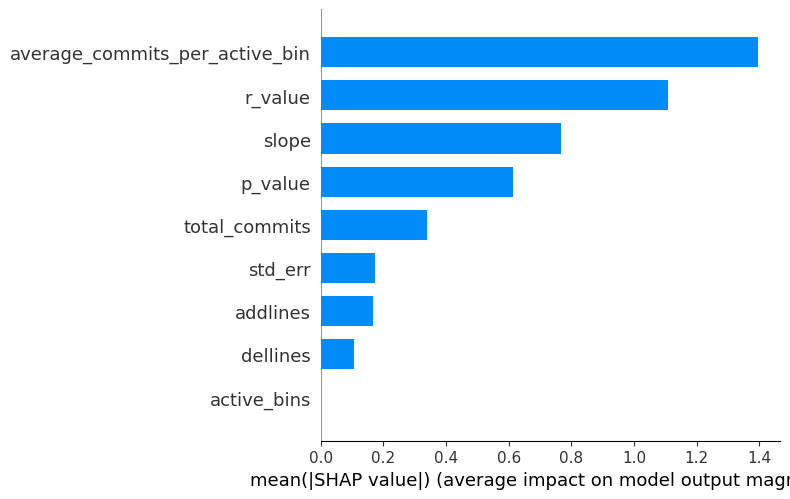

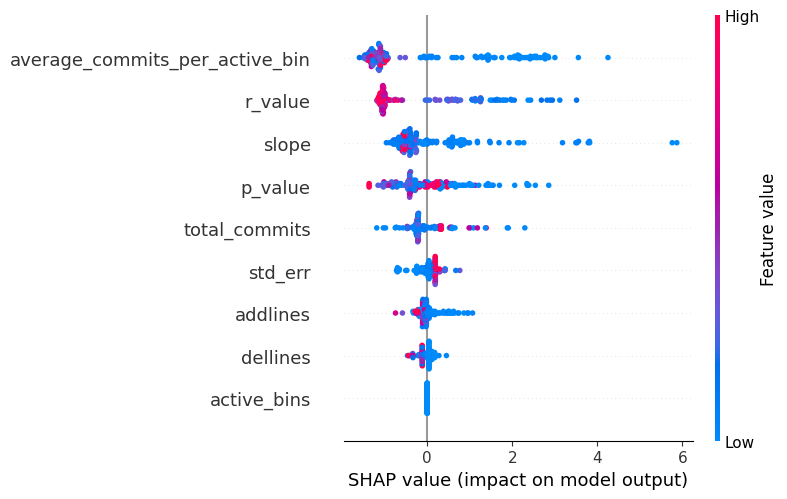

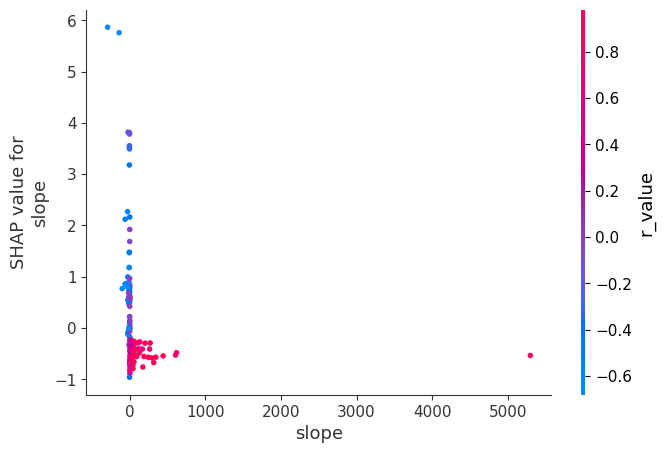

In [ ]:
import shap

# Initialize the SHAP Explainer
# For GradientBoostingClassifier, we use the TreeExplainer which is optimized for tree-based models
explainer = shap.TreeExplainer(rf_classifier)
shap_values = explainer.shap_values(X_train)
print(shap_values)
# Summary Plot for the first class in a multiclass setting
shap.summary_plot(shap_values, X_train, plot_type="bar")  # Adjust the index based on the class of interest

# Detailed Summary Plot (not just bar) for the first class
shap.summary_plot(shap_values, X_train)

# Dependence Plot for a specific feature for the first class
# Replace 'feature_name' with the actual name of the feature you're interested in
shap.dependence_plot('slope', shap_values, X_train)

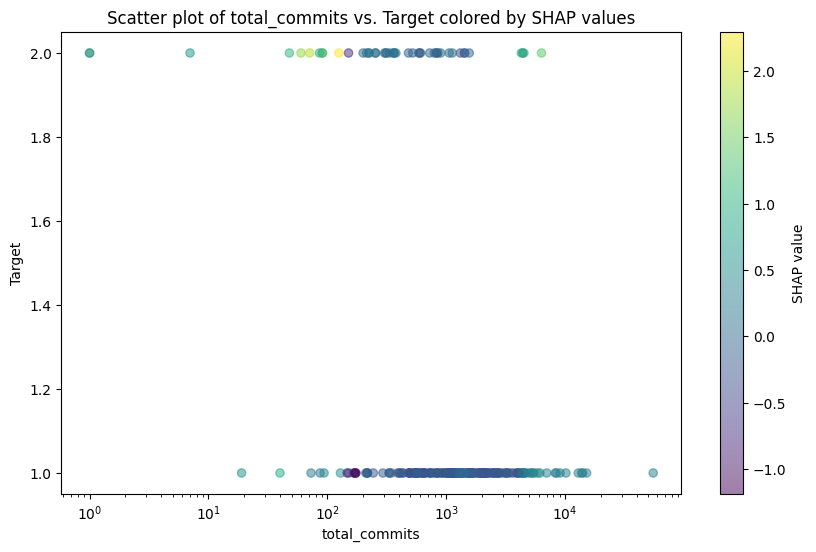

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'model' is your trained model and 'X' is the feature DataFrame
explainer = shap.Explainer(rf_classifier)
shap_values = explainer(X)

# Example for the first feature column
feature_name = X.columns[0]
shap_values_for_feature = shap_values[:, feature_name].values

plt.figure(figsize=(10, 6))
sc = plt.scatter(X[feature_name], y, c=shap_values_for_feature, cmap='viridis', alpha=0.5)
plt.colorbar(sc, label='SHAP value')
plt.title(f'Scatter plot of {feature_name} vs. Target colored by SHAP values')
plt.xlabel(feature_name)
plt.ylabel('Target')
plt.xscale('log')
plt.show()

In [ ]:
shap_sum = np.abs(shap_values.values).mean(axis=0)
feature_importance = pd.DataFrame(list(zip(X.columns, shap_sum)), columns=['feature', 'shap_importance'])
feature_importance.sort_values(by=['shap_importance'], ascending=False, inplace=True)

# Select top 3 features
top_features = feature_importance[:3]['feature'].values

Index(['total_commits', 'average_commits_per_active_bin', 'addlines'], dtype='object')


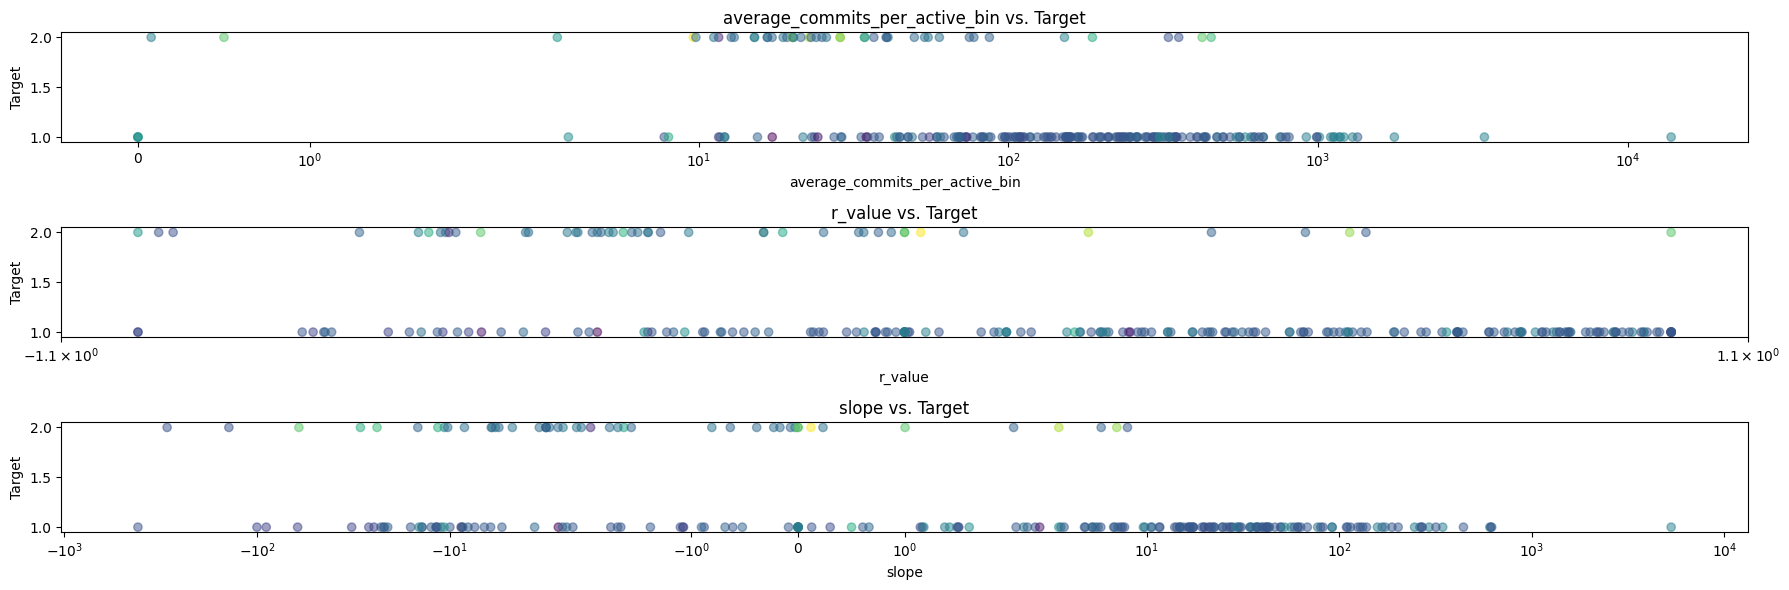

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'X' is your DataFrame with the features and 'y' is your target variable
# Let's choose the first three features for illustration
features_to_plot = X.columns[:3]
print(features_to_plot)
fig, axs = plt.subplots(3, 1, figsize=(18, 6))  # 1 row, 3 columns

for i, feature in enumerate(top_features):
    axs[i].scatter(X[feature], y, c=shap_values_for_feature,alpha=0.5)
    axs[i].set_title(f'{feature} vs. Target')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Target')
    axs[i].set_xscale('symlog')
plt.tight_layout()
plt.show()

In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
220    2
221    2
222    2
223    2
224    2
Name: project_status, Length: 225, dtype: int64

In [ ]:
for i, feature in enumerate(top_features):
    X[feature]
    rejects=X[feature][y==1]
    q1 = np.percentile(rejects, 25)
    median = np.median(rejects)
    q3 = np.percentile(rejects, 75)
    print(q1,median,q3)

72.93333333333334 168.14285714285714 346.2166666666667
-0.030933368824672007 0.3953832902480638 0.7843986552048813
-0.6460732714138289 9.624542124542124 39.85714285714286


In [ ]:
import numpy as np
import pandas as pd

# Assuming 'shap_values' is your array of SHAP values from SHAP Explainer and X_train is your training dataset
mean_abs_shap = np.abs(shap_values.values).mean(axis=0)
features = X_train.columns

# Create a DataFrame for easier viewing
shap_summary_table = pd.DataFrame({
    'Feature': features,
    'Mean Absolute SHAP Value': mean_abs_shap
}).sort_values(by='Mean Absolute SHAP Value', ascending=False).reset_index(drop=True)

In [ ]:
print(shap_summary_table)

                          Feature  Mean Absolute SHAP Value
0  average_commits_per_active_bin                  1.406641
1                         r_value                  1.129905
2                           slope                  0.749933
3                         p_value                  0.597823
4                   total_commits                  0.310733
5                         std_err                  0.170932
6                        addlines                  0.165522
7                        dellines                  0.107555
8                     active_bins                  0.000000


In [ ]:
model_names=['KNN', 'SVM', 'Extra Trees','RandomForest','Gradient Boosting']
accuracy=[76,      78,   81,            87             90]

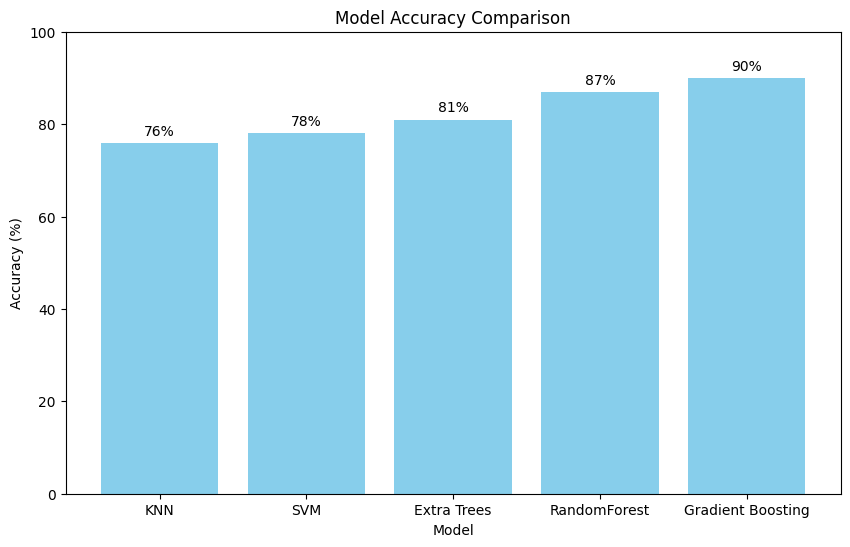

In [ ]:
model_names = ['KNN', 'SVM', 'Extra Trees', 'RandomForest', 'Gradient Boosting']
accuracy = [76, 78, 81, 87, 90]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 100)  # Extend y-axis to make differences more noticeable
for i, acc in enumerate(accuracy):
    plt.text(i, acc + 1, f"{acc}%", ha='center', va='bottom')  # Annotate each bar with accuracy percentage

plt.show()